In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as ospj
from utils import *

In [3]:
usr,passpath,datapath,prodatapath,figpath,patient_table,rid_hup,pt_list = load_config(ospj('/mnt/leif/littlab/users/wojemann/stim-seizures/code','config.json'))

In [4]:
def boolize(x):
    map_dict = {'Yes': True, 
                'No' : False,
                'Unclear': False
               }
    ret = []
    for item in x:
        ret.append(map_dict[item])
    return ret

def dice_score(x,y):
    num = 2*len(np.intersect1d(x,y))
    denom = len(x)+len(y)
    return num/denom

In [5]:
loc_lat = pd.read_csv(ospj(prodatapath,'Review of our stim seizures - LFS.csv')).drop(['Patient','Unnamed: 23'],axis=1)
loc_lat.dropna(how = 'any',subset=['Stim seizure contact'],inplace=True)

In [6]:
loc_lat.columns

Index(['hupsubjno', 'Implant coverage', 'Spontaneous SOZ', 'emuimplant_soz',
       'ieeg_ictal_onset_electrodes', 'ieeg_ictal_onset_anat_lat',
       'ieeg_ictal_onset_anat_spec', 'cceps_run1_pulsewidth', 'cceps_run1_sz',
       'Stim seizure contact', 'cceps_run1_soz_electrodes', 'Stim SOZ',
       'Concordant lat?', 'Concordant loc?',
       'Was there stim contralateral to seizure site?', 'cceps_run1_szelecs',
       'cceps_run1_soz_electrodes.1', 'cceps_run1_seizure_typical',
       'Typical semiology?', 'Semiology notes', 'Complications', 'Math'],
      dtype='object')

In [7]:
loc_lat[loc_lat.columns[:14]].head(20)

,hupsubjno,Implant coverage,Spontaneous SOZ,emuimplant_soz,ieeg_ictal_onset_electrodes,ieeg_ictal_onset_anat_lat,ieeg_ictal_onset_anat_spec,cceps_run1_pulsewidth,cceps_run1_sz,Stim seizure contact,cceps_run1_soz_electrodes,Stim SOZ,Concordant lat?,Concordant loc?
10,224.0,B/L,Right hippocampus,right hippocampus,"RB2, RB3, RC2",2.0,hippocampus,300.0,1.0,Left hippocampus,"LB1, LB2, LB3, LB4, LB5, LC1, LC2, LC3, LC4, L...",Left hippocampus,No,Yes
11,225.0,R,Right temporal neocortex,temporal neocortex,"RT4, RT5",2.0,temporal neocortex,300.0,1.0,RIght hippocampus,"RB1, RB2, RB3, RB4",RIght hippocampus,Yes,No
13,229.0,L,Left hippocampus,"Epilepsy, Focal Epilepsy Left Lateralization, ...","LB1, LB2, LA1, LA2",1.0,mesial temporal,300.0,1.0,Left near-hippocampus (peri-hippocampal lesion),"LB1, LB2, LC1, LC2, LC3",Left hippocampus,Yes,Yes
14,230.0,L,Left hippocampus,Focal Epilepsy,"LC1, LC2, LC3, LB1, LB2",1.0,hippocampus,500.0,1.0,Left hippocampus,"LC1, LC2, LC3, LC4",Left hippocampus,Yes,Yes
16,235.0,L,Left hippocampus,"Number of seizures captured: 13(5 FIAS, & 8 el...","LC1, LC2, LB2, LB3",1.0,hippocampal tail/body,500.0,1.0,Left amygdala,"LA1, LA2, LA3, LB1, LB2, LB3, LC1, LC2, LC3, L...",Left amygdala and hippocampus,Yes,Yes
18,238.0,L,Left hippocampus,NaN,"LB1, LB2, LB3, LC1, LC2, LC3",1.0,hippocampus,500.0,1.0,Left hippocampus,"LB1, LB2, LB3, LC1, LC2, LC3",Left hippocampus,Yes,Yes
23,246.0,L,Left hippocampus,left hippocampus,NaN,1.0,hippocampus,500.0,1.0,Left hippocampus,"LA1, LA2, LA3, LA4, LB1, LB2, LB3, LB4, LC1, L...",Left amygdala and hippocampus,Yes,Yes
24,247.0,R,Right parietooccipital,right parietooccipital FCD,RP1-3,2.0,parietooccipital,500.0,1.0,Right parietooccipital,NaN,Right parietooccipital,Yes,Yes
26,249.0,B/L,Broad,broad - both left mesial temporal and various ...,NaN,3.0,broad,500.0,1.0,Right hippocampus,RA1,Right amygdala,Unclear,Unclear
27,250.0,B/L,Broad,"broad (left TPO, left basal/temporal, right hi...",NaN,NaN,NaN,500.0,1.0,Left hippocampus,"LB1, LC1",Left hippocampus,Unclear,Unclear


In [8]:
concordance = loc_lat[['Concordant lat?','Concordant loc?']].apply(boolize)
concordance["combined"] = pd.DataFrame(concordance['Concordant lat?'] & concordance['Concordant loc?'])

Text(0.5, 1.0, 'p-value: 0.03515625')

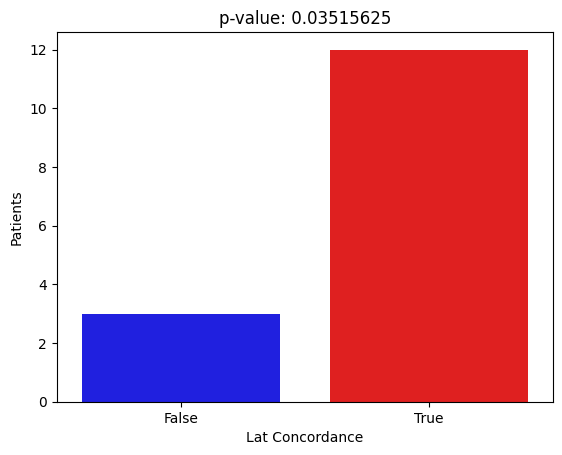

In [9]:
to_plot = concordance.groupby('Concordant lat?')[['Concordant lat?']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['Concordant lat?'],palette = ['blue','red'])
# obs = concordance.groupby('Concordant lat?')[['combined']].count()
obs = concordance['Concordant lat?']
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue
plt.ylabel('Patients')
plt.xlabel('Lat Concordance')
plt.title(f'p-value: {p}')

Text(0.5, 1.0, 'p-value: 0.30175781249999994')

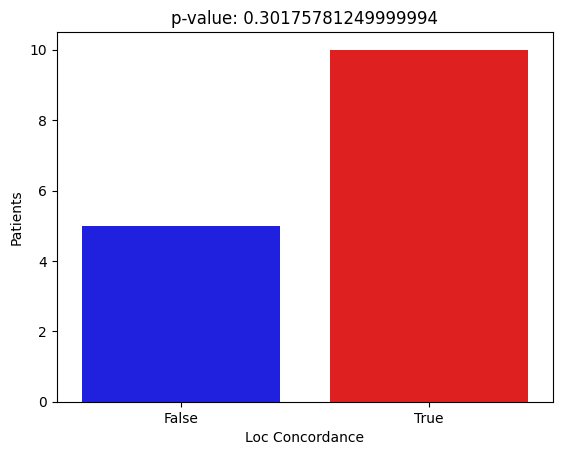

In [10]:
to_plot = concordance.groupby('Concordant loc?')[['Concordant loc?']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['Concordant loc?'], palette = ['blue','red']) 
# obs = concordance.groupby('Concordant loc?')[['combined']].count()
obs = concordance['Concordant loc?']
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue

plt.ylabel('Patients')
plt.xlabel('Loc Concordance')
plt.title(f'p-value: {p}')

Text(0.5, 1.0, 'p-value: 0.6072387695312499')

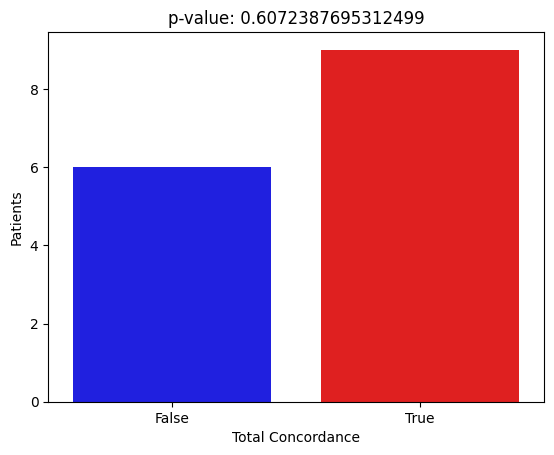

In [11]:
to_plot = concordance.groupby('combined')[['combined']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['combined'],palette = ['blue','red'])
# obs = concordance.groupby('combined')[['combined']].count()
obs = concordance.combined
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue
plt.ylabel('Patients')
plt.xlabel('Total Concordance')
plt.title(f'p-value: {p}')

Text(0.5, 1.0, 'p-value: 0.6072387695312499')

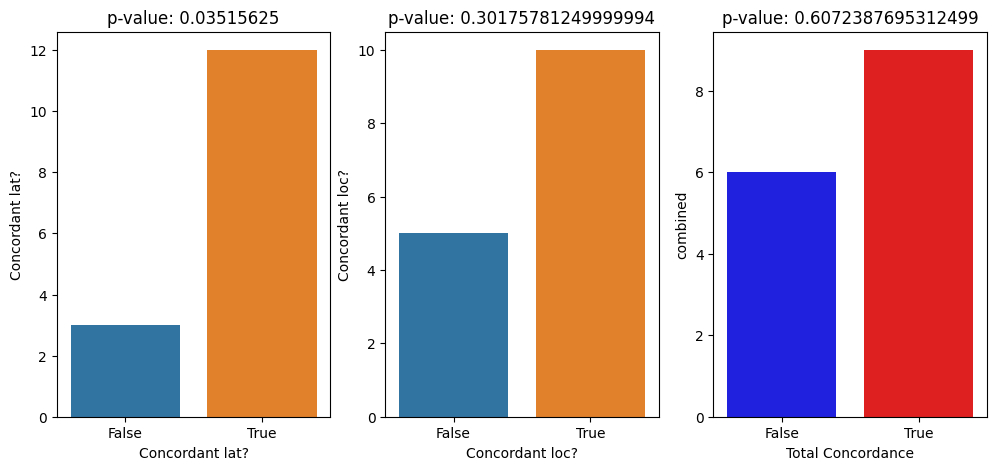

In [12]:
fig,axs = plt.subplots(1,3,figsize=(12,5))
to_plot = concordance.groupby('Concordant lat?')[['Concordant lat?']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['Concordant lat?'],ax=axs[0])
# obs = concordance.groupby('Concordant lat?')[['combined']].count()
obs = concordance['Concordant lat?']
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue
# plt.ylabel('Patients')
plt.xlabel('Lat Concordance')
axs[0].set_title(f'p-value: {p}')

to_plot = concordance.groupby('Concordant loc?')[['Concordant loc?']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['Concordant loc?'],ax=axs[1]) 
# obs = concordance.groupby('Concordant loc?')[['combined']].count()
obs = concordance['Concordant loc?']
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue

# plt.ylabel('Patients')
plt.xlabel('Loc Concordance')
axs[1].set_title(f'p-value: {p}')

to_plot = concordance.groupby('combined')[['combined']].count()
sns.barplot(x = to_plot.index.astype(str), y = to_plot['combined'],ax=axs[2],palette = ['blue','red'])
# obs = concordance.groupby('combined')[['combined']].count()
obs = concordance.combined
p = sc.stats.binomtest(sum(obs),len(obs)).pvalue

plt.xlabel('Total Concordance')
axs[2].set_title(f'p-value: {p}')

## Mapping from DKT to surgical

In [26]:
electrode_regions = pd.read_pickle(ospj(prodatapath,"CHOP005","electrode_localizations_CHOPR.pkl"))
electrode_regions.head(15)

,name,x,y,z,label,isgrey
0,LK01,98.546875,114.695312,59.000000,EmptyLabel,3
1,LK02,95.052761,114.824724,59.156271,EmptyLabel,1
2,LK03,91.558647,114.954136,59.312541,EmptyLabel,1
3,LK04,88.064533,115.083547,59.468812,Left-Amygdala,1
4,LK05,84.570419,115.212959,59.625083,Left-Amygdala,1
5,LK06,81.076305,115.342371,59.781353,Left-Amygdala,1
6,LK07,77.582191,115.471782,59.937624,Left-Cerebral-White-Matter,2
7,LK08,74.088078,115.601194,60.093895,Left-Cerebral-White-Matter,2
8,LK09,70.593964,115.730606,60.250165,Left-Cerebral-White-Matter,2
9,LK10,67.099850,115.860017,60.406436,ctx-lh-inferiortemporal,1


In [43]:
electrode_regions.head()
for i,row in electrode_regions.iterrows():
    label = row.label
    if isinstance(label,float):
        label = "EmptyLabel"
    label = label.lower()
    if ("emptylabel" in label) or ("white" in label):
        surgical_label = "EmptyLabel"
    elif ("amygdala" in label) or ("hippocampus" in label):
        if "left" in label:
            surgical_label = 'left mesial temporal'
        else:
            surgical_label = 'right mesial temporal'
    elif ("temporal" in label) or ("fusiform" in label) or ("entorhinal" in label) or ("parahippocampal" in label):
        if "left" in label:
            surgical_label = 'left temporal cortex'
        else:
            surgical_label = 'right temporal cortex'
    else:
        if "left" in label:
            surgical_label = 'left other cortex'
        else:
            surgical_label = 'right other cortex'
    print(label, surgical_label)

emptylabel EmptyLabel
emptylabel EmptyLabel
emptylabel EmptyLabel
left-amygdala left mesial temporal
left-amygdala left mesial temporal
left-amygdala left mesial temporal
left-cerebral-white-matter EmptyLabel
left-cerebral-white-matter EmptyLabel
left-cerebral-white-matter EmptyLabel
ctx-lh-inferiortemporal right temporal cortex
ctx-lh-middletemporal right temporal cortex
left-cerebral-white-matter EmptyLabel
ctx-lh-middletemporal right temporal cortex
ctx-lh-middletemporal right temporal cortex
left-hippocampus left mesial temporal
left-hippocampus left mesial temporal
left-hippocampus left mesial temporal
left-hippocampus left mesial temporal
ctx-lh-fusiform right temporal cortex
ctx-lh-fusiform right temporal cortex
ctx-lh-fusiform right temporal cortex
left-cerebral-white-matter EmptyLabel
left-cerebral-white-matter EmptyLabel
left-cerebral-white-matter EmptyLabel
ctx-lh-middletemporal right temporal cortex
ctx-lh-middletemporal right temporal cortex
ctx-lh-middletemporal right tem

In [41]:
isinstance(electrode_regions.iloc[i,:].label,float)

True

In [ ]:
function locs = localize_regions(names,atlas)

locs = cell(length(names),1);

if strcmp(atlas,'aal')
    atlas = 'aal_bernabei';
end

switch atlas
    
    case 'aal_bernabei'
        for i = 1:length(names)
            curr = names{i};
            
            if contains(curr,'Hippocamp') || contains(curr,'Amygdala')
                if strcmp(curr(end-1:end),'_L')
                    locs{i} = 'left mesial temporal';
                elseif strcmp(curr(end-1:end),'_R')
                    locs{i} = 'right mesial temporal';
                end
            elseif contains(curr,'Fusiform') || contains(curr,'Heschl') || ...
                    contains(curr,'Temporal')
                if strcmp(curr(end-1:end),'_L')
                    locs{i} = 'left temporal neocortical';
                elseif strcmp(curr(end-1:end),'_R')
                    locs{i} = 'right temporal neocortical';
                end
                
            elseif contains(curr,'White_Matter') || contains(curr,'Vermis') || ...
                    contains(curr,'Cerebelum') || contains(curr,'Thalamus') || ...
                    contains(curr,'Putamen') || contains(curr,'Caudate') || ...
                    contains(curr,'Pallidum')
                %locs{i} = 'other';
            else
                if strcmp(curr(end-1:end),'_L')
                    locs{i} = 'left other cortex';
                elseif strcmp(curr(end-1:end),'_R')
                    locs{i} = 'right other cortex';
                end
                
            end
                
        end
        
    case 'brainnetome'
        
        for i = 1:length(names)
            curr = names{i};
            
            if contains(curr,'Tha') || contains(curr,'BG')
            elseif contains(curr,'Amyg') || contains(curr,'Hipp') || ...
                    contains(curr,'PhG')
                if strcmp(curr(end-1:end),'_L')
                    locs{i} = 'left mesial temporal';
                elseif strcmp(curr(end-1:end),'_R')
                    locs{i} = 'right mesial temporal';
                end
            elseif contains(curr,'STG') || contains(curr,'MTG') || ...
                    contains(curr,'ITG') || contains(curr,'FuG') || ...
                    contains(curr,'pSTS')
                if strcmp(curr(end-1:end),'_L')
                    locs{i} = 'left temporal neocortical';
                elseif strcmp(curr(end-1:end),'_R')
                    locs{i} = 'right temporal neocortical';
                end
            else
                if strcmp(curr(end-1:end),'_L')
                    locs{i} = 'left other cortex';
                elseif strcmp(curr(end-1:end),'_R')
                    locs{i} = 'right other cortex';
                end
            end
        
        end
                 
end

if 0
    table(names,locs)
end

end